# The seaborn.objects interface

In [1]:
import seaborn as sns
sns.set_theme()

In [2]:
sns.__version__

'0.12.2'

seaborn.objects 네임스페이스는 seaborn 플롯을 만들기 위한 완전히 새로운 인터페이스로 버전 0.12에서 도입되었습니다.   
데이터 변환 및 플로팅을 위한 구성 가능한 클래스 모음으로 구성된 보다 일관되고 유연한 API를 제공합니다.   
기존 seaborn 기능과 달리 새로운 인터페이스는 처음부터 끝까지 플롯 상세내용 및 사용자지정을 matplotlib을 드롭다운하지 않고 지원하는 것을 목표로 합니다(필요한 경우 계속 가능함).   
   
> objects 인터페이스는 현재 실험적이며 불완전합니다. 활용하기에 충분히 안정적이지만 일부 다듬어지지 않거나 누락된 기능은 있습니다.

## Specifying a plot and mapping data

In [3]:
# objects interface 로드
# seaborn.objects 네임스페이스 : 모든 관련 클래스에 대한 액세스 제공
import seaborn.objects as so

In [4]:
# 사용 데이터 로드
penguins = sns.load_dataset("penguins")

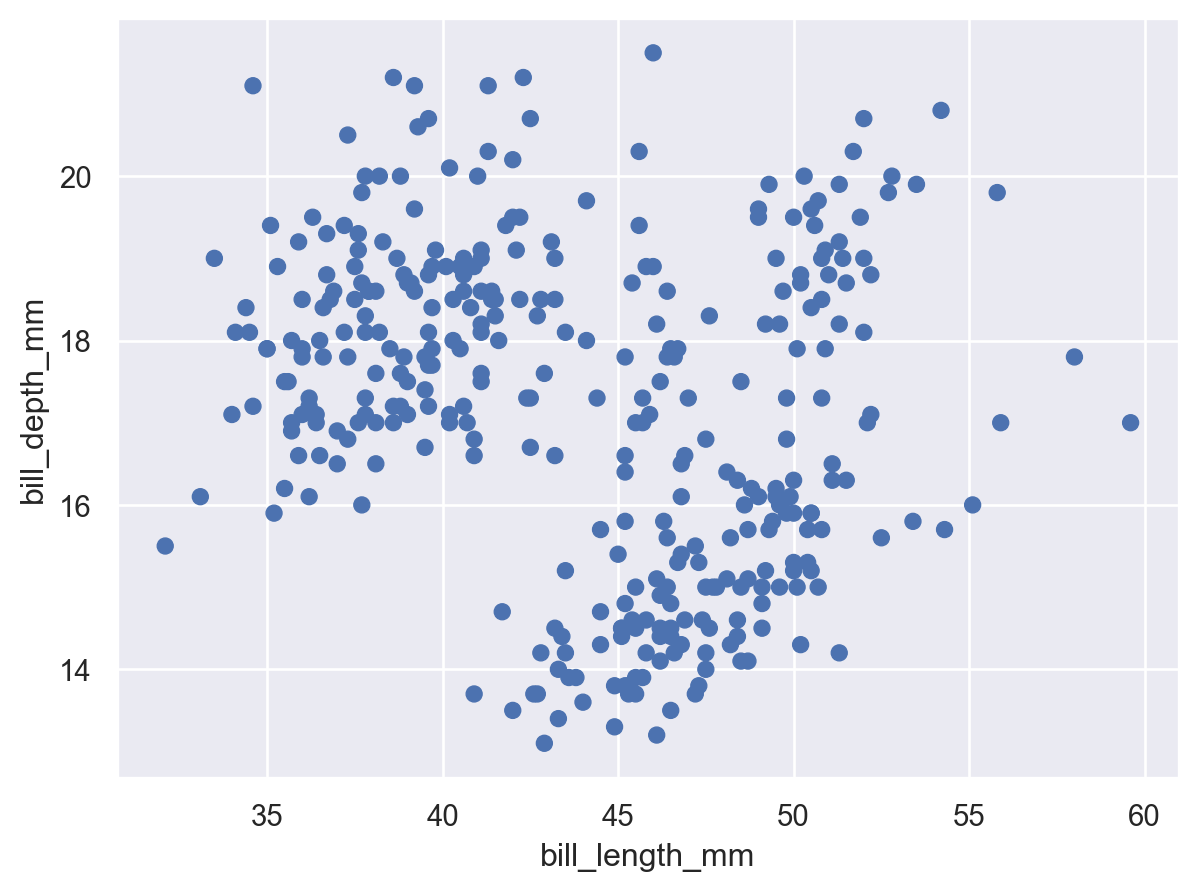

In [5]:
# Plot 객체 인스턴스화 > 해당 메서드를 호출하여 플롯 지정
(
    so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm")
    .add(so.Dot())
)

산점도를 생성하는 이 코드는 꽤 친숙하게 보일 것입니다.   
seaborn.scatterplot()을 사용할 때와 마찬가지로 깔끔한 데이터 프레임(펭귄)을 전달하고 해당 열 중 두 개를 플롯의 x 와 y 에 할당했습니다.   
그러나 차트 유형으로 시작한 다음 일부 데이터 할당을 추가하는 대신 여기서는 데이터 할당으로 시작한 다음 그래픽 요소를 추가했습니다.   

### Setting properties
   
`Dot` 클래스는 데이터 값을 그래픽으로 나타내는 개체인 `Mark`의 예입니다. 각 마크에는 모양을 변경하기 위해 설정할 수 있는 여러 속성이 있습니다.

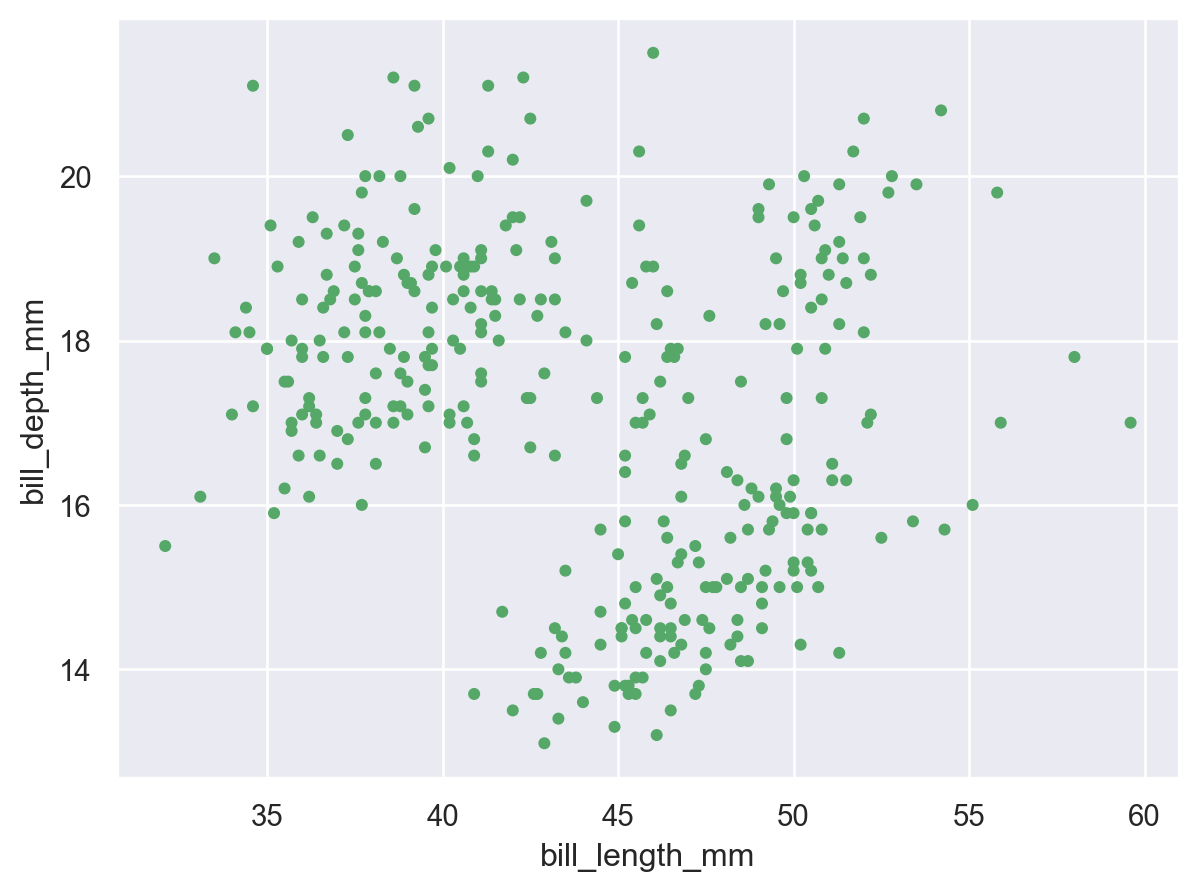

In [6]:
(
    so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm")
    .add(so.Dot(color="g", pointsize=4))
)

### Mapping properties
    
seaborn의 기능과 마찬가지로 데이터 값을 다양한 그래픽 속성에 매핑하는 것도 가능합니다.

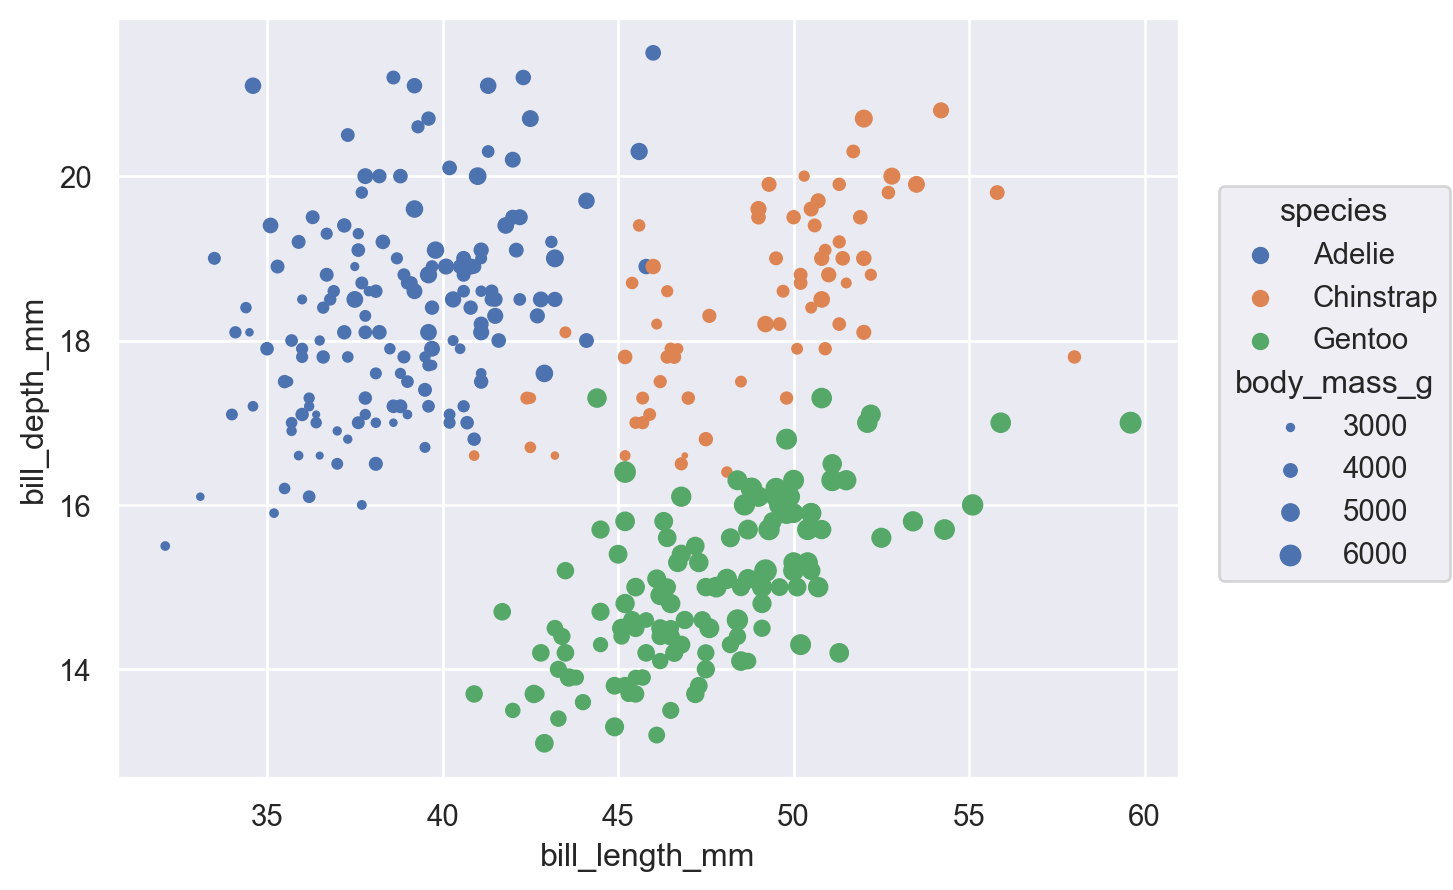

In [7]:
(
    so.Plot(
        penguins, x="bill_length_mm", y="bill_depth_mm",
        color="species", pointsize="body_mass_g",
    )
    .add(so.Dot())
)

이 기본 기능이 새롭지는 않지만 함수 API와의 중요한 차이점은 속성을 직접 설정하는 동일한 파라미터 이름을 사용하여 속성이 매핑된다는 것입니다(hue vs. color 등 대신). 중요한 것은 속성이 정의된 위치입니다. `Dot` 설정 초기에 **값**을 전달하면 직접 설정되지만 `Plot`을 설정할 때 **변수**를 할당하면 해당 데이터가 매핑됩니다.   
이러한 차이점 외에도 개체 인터페이스를 사용하면 훨씬 더 광범위한 마크 속성을 매핑할 수 있습니다.

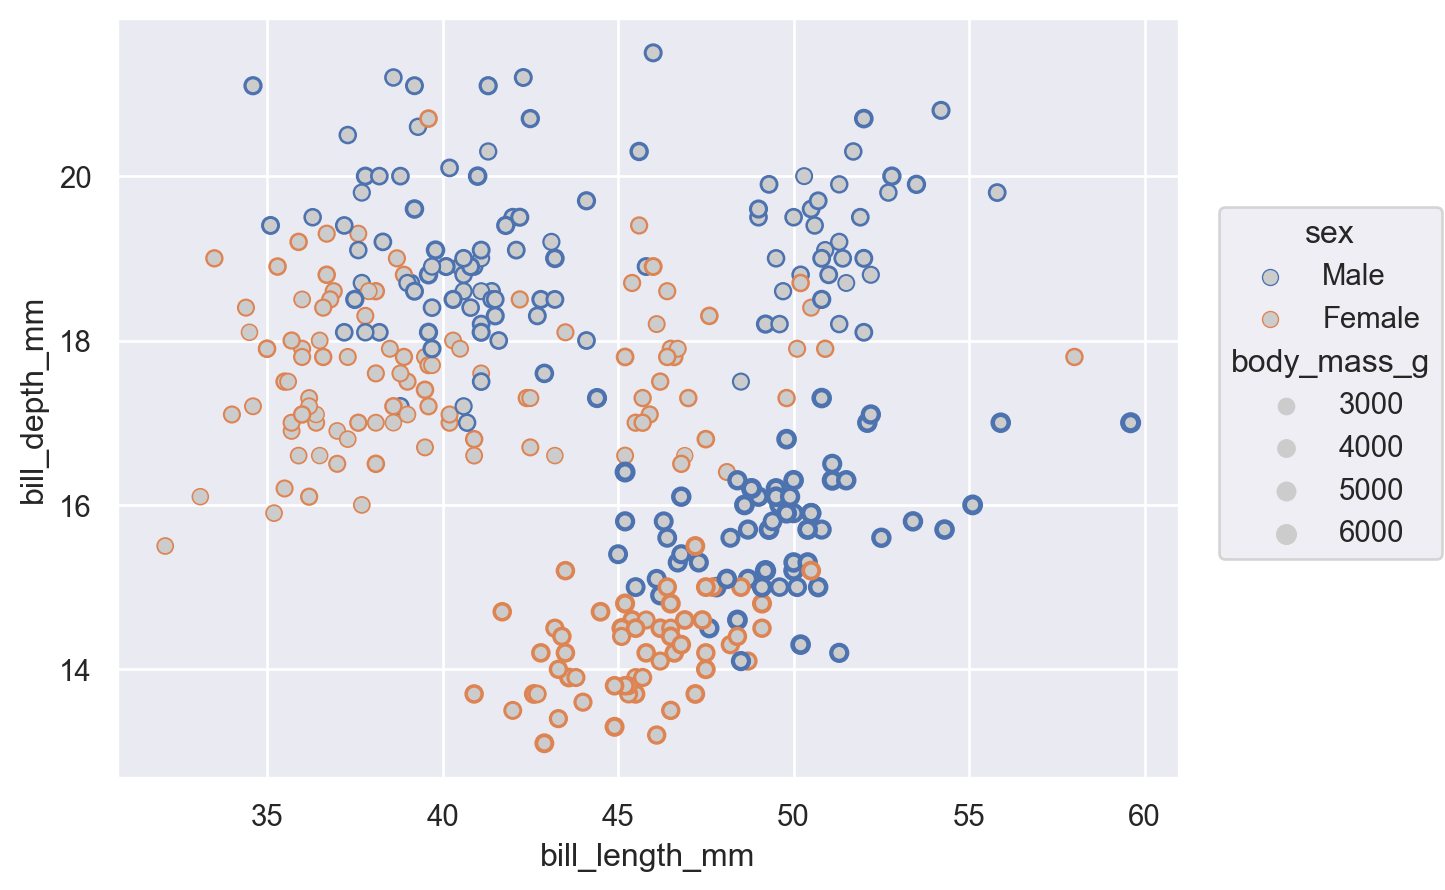

In [8]:
(
    so.Plot(
        penguins, x="bill_length_mm", y="bill_depth_mm",
        edgecolor="sex", edgewidth="body_mass_g",
    )
    .add(so.Dot(color=".8"))
)

### Defining groups

`Dot`은 각 데이터 포인트를 독립적으로 나타내므로 속성에 변수를 할당해도 각 점의 모양이 변경되는 효과만 있습니다.   
`Line`과 같이 관찰을 그룹화하거나 연결하는 마크의 경우 고유한 그래픽 요소의 수도 결정합니다.

In [9]:
healthexp = sns.load_dataset("healthexp")
healthexp.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


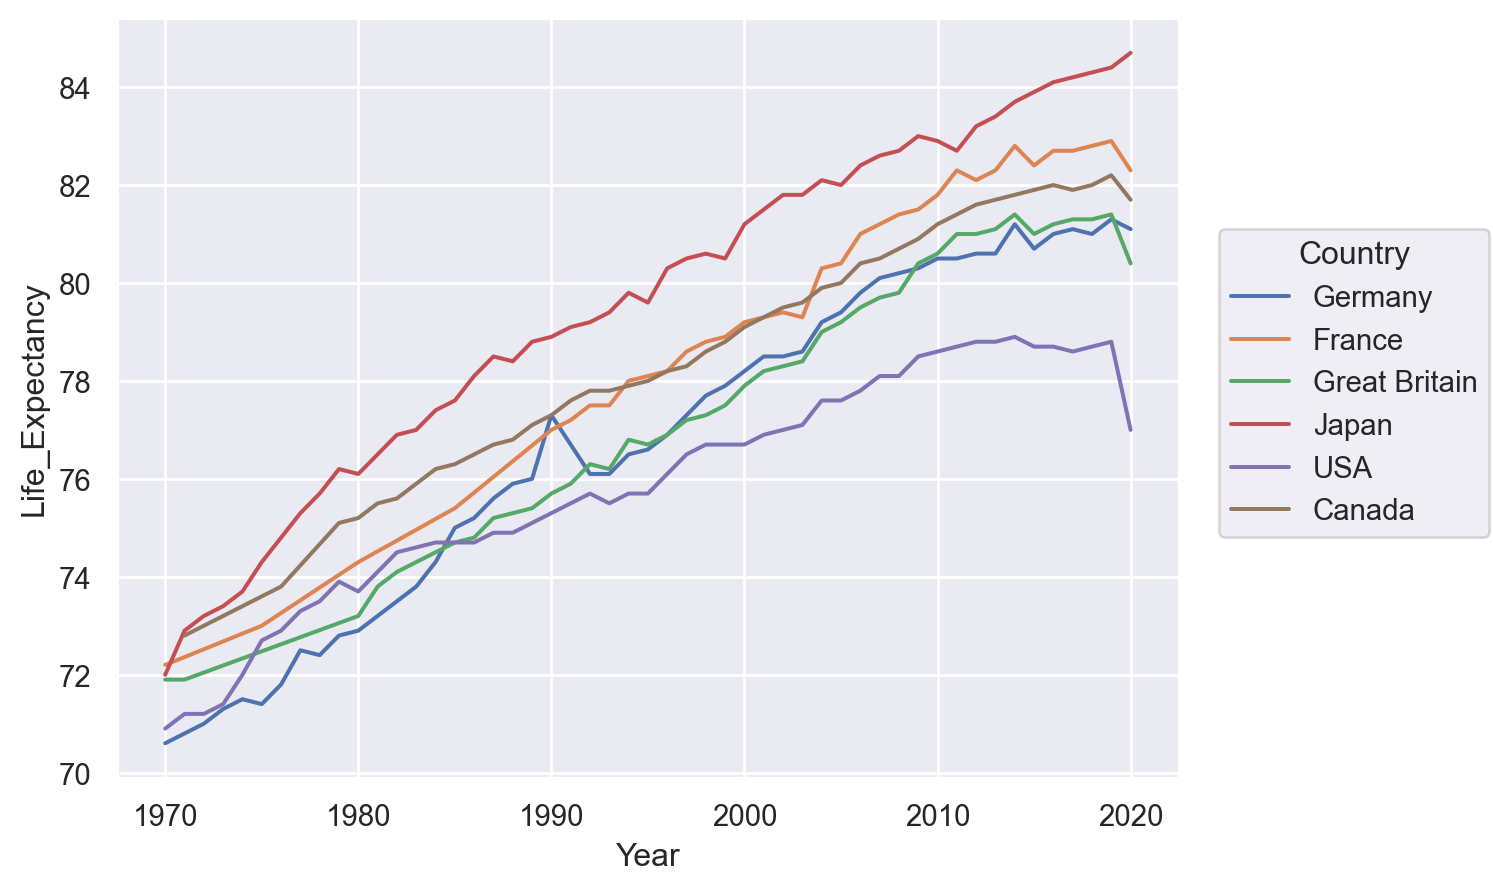

In [10]:
(
    so.Plot(healthexp, x="Year", y="Life_Expectancy", color="Country")
    .add(so.Line())
)

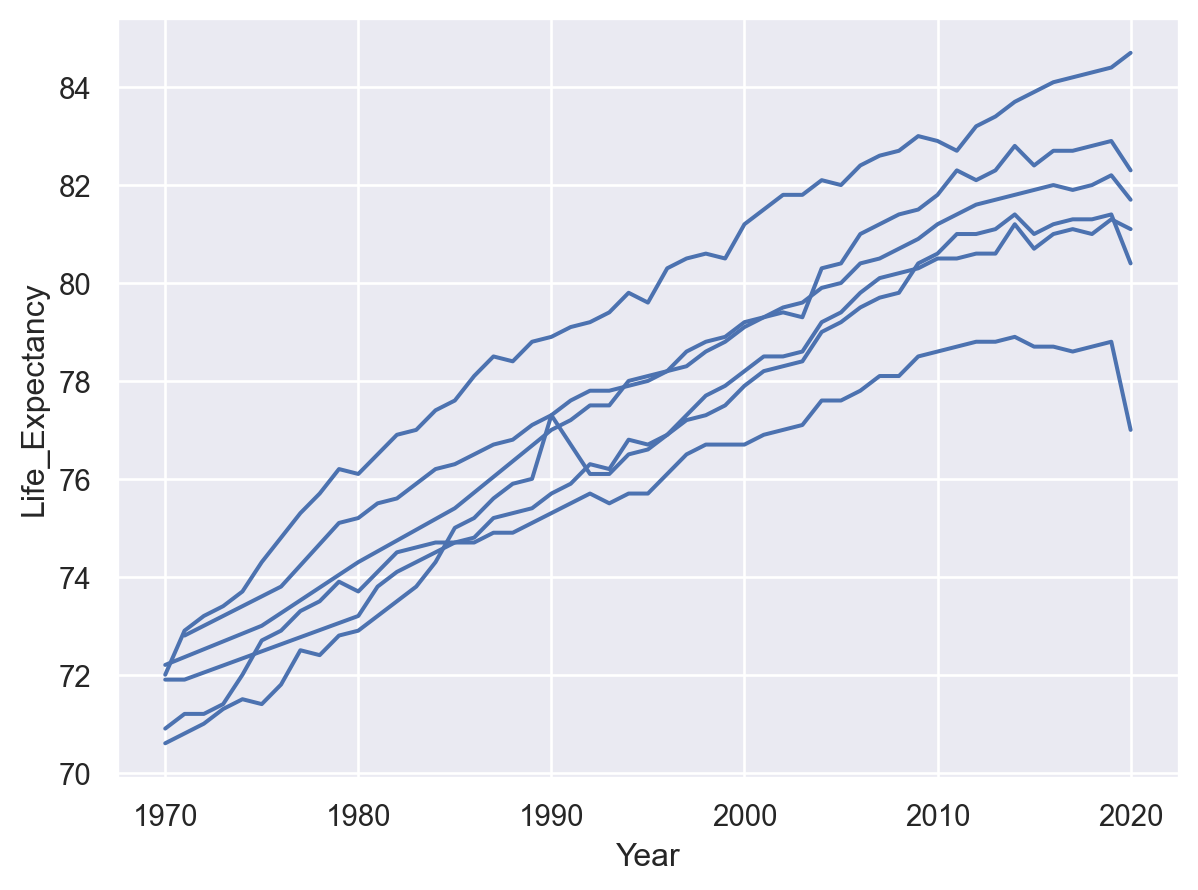

In [11]:
# group을 사용하여 시각적 속성을 변경하지 않고 그룹 정의
(
    so.Plot(healthexp, x="Year", y="Life_Expectancy", group="Country")
    .add(so.Line())
)

## Transforming data before plotting
### Statistical transformation
    
많은 seaborn 함수와 마찬가지로 객체 인터페이스는 통계적 변환 지원  => `Agg`와 같은 `Stat` 개체에 의해 수행 

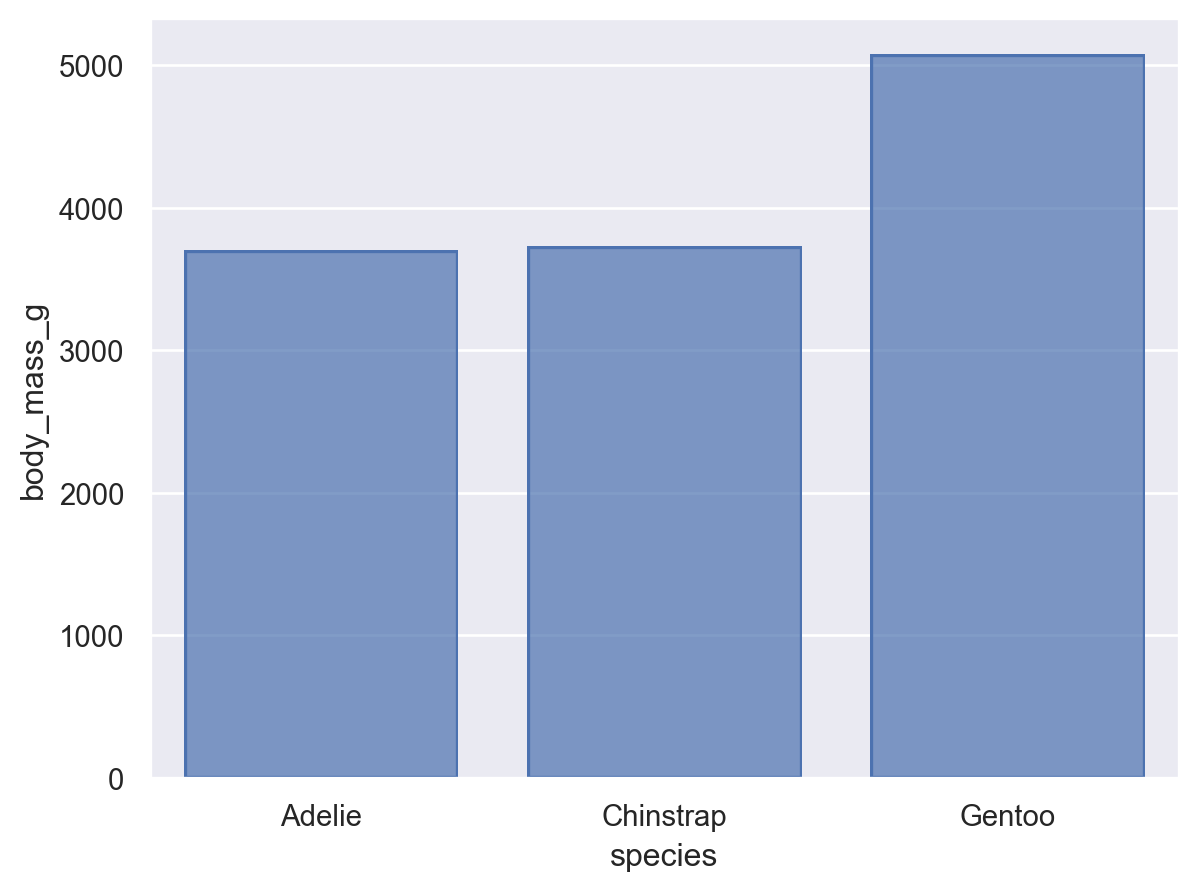

In [12]:
(
    so.Plot(penguins, x="species", y="body_mass_g")
    .add(so.Bar(), so.Agg())
)

함수 인터페이스에서 일부 시각적 표현(예: `seaborn.barplot()`)에서는 통계적 변환이 가능하지만 다른 것(예: `seaborn.scatterplot()`)에서는 불가능합니다.    
개체 인터페이스는 표시와 변환을 보다 명확하게 분리하여 `Mark` 및 `Stat` 개체를 구성할 수 있습니다.

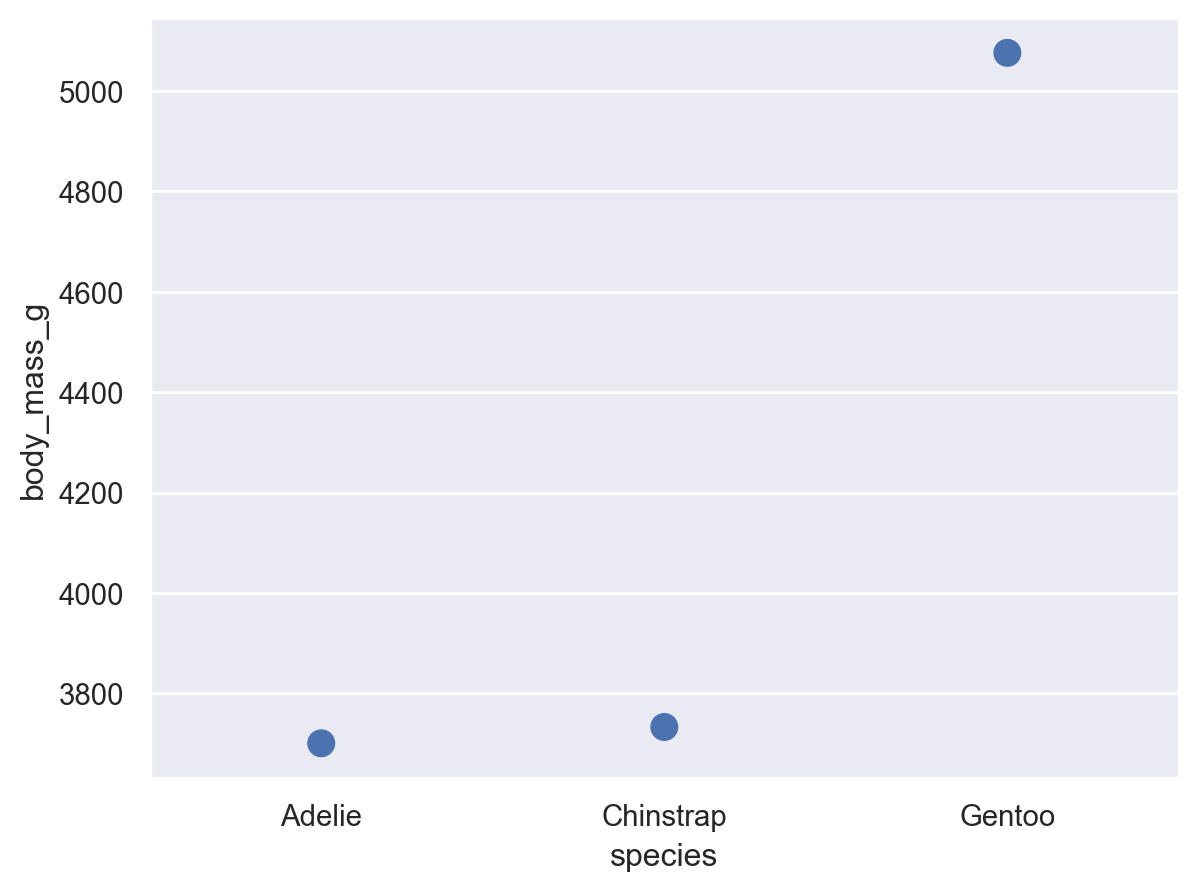

In [13]:
(
    so.Plot(penguins, x="species", y="body_mass_g")
    .add(so.Dot(pointsize=10), so.Agg())
)

속성을 매핑하여 그룹을 형성할 때 `stat` 변환은 각 그룹에 개별적으로 적용

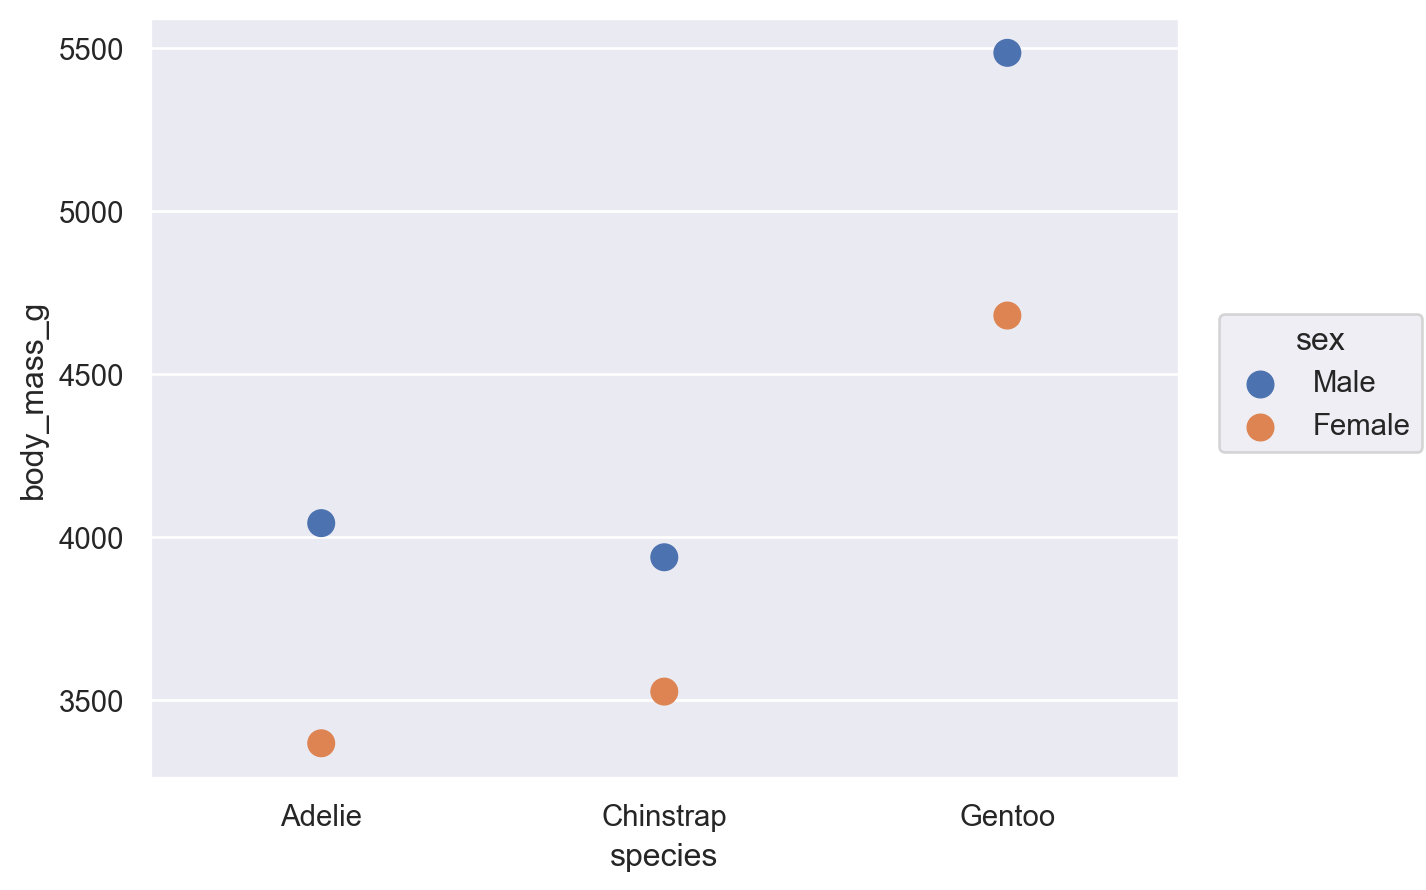

In [14]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(pointsize=10), so.Agg())
)

### Resolving overplotting

일부 seaborn 함수에는 `hue` 속성이 할당되면 `seaborn.barplot()`이 막대를 "dodges"할 때와 같이, 오버플로팅을 자동으로 해결하는 메커니즘이 있습니다.    
개체 인터페이스에는 덜 복잡한 기본 동작이 있습니다.    
여러 그룹을 나타내는 막대는 기본적으로 겹칩니다.

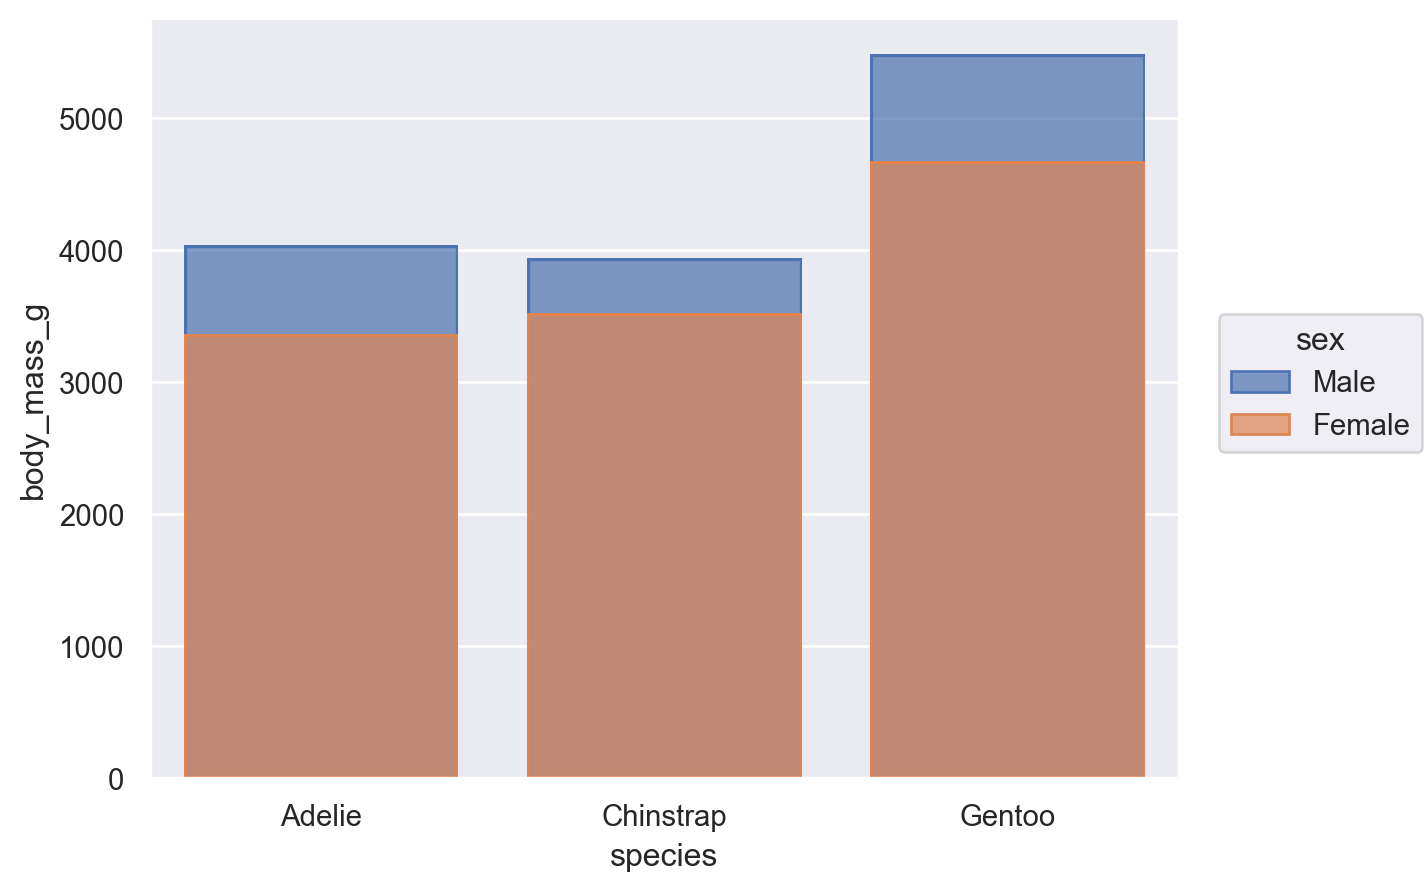

In [15]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg())
)

그럼에도 불구하고 `Dodge`에 의해 구현된 `Agg` 통계 및 두 번째 변환으로 `Bar` 마크를 구성할 수 있습니다.

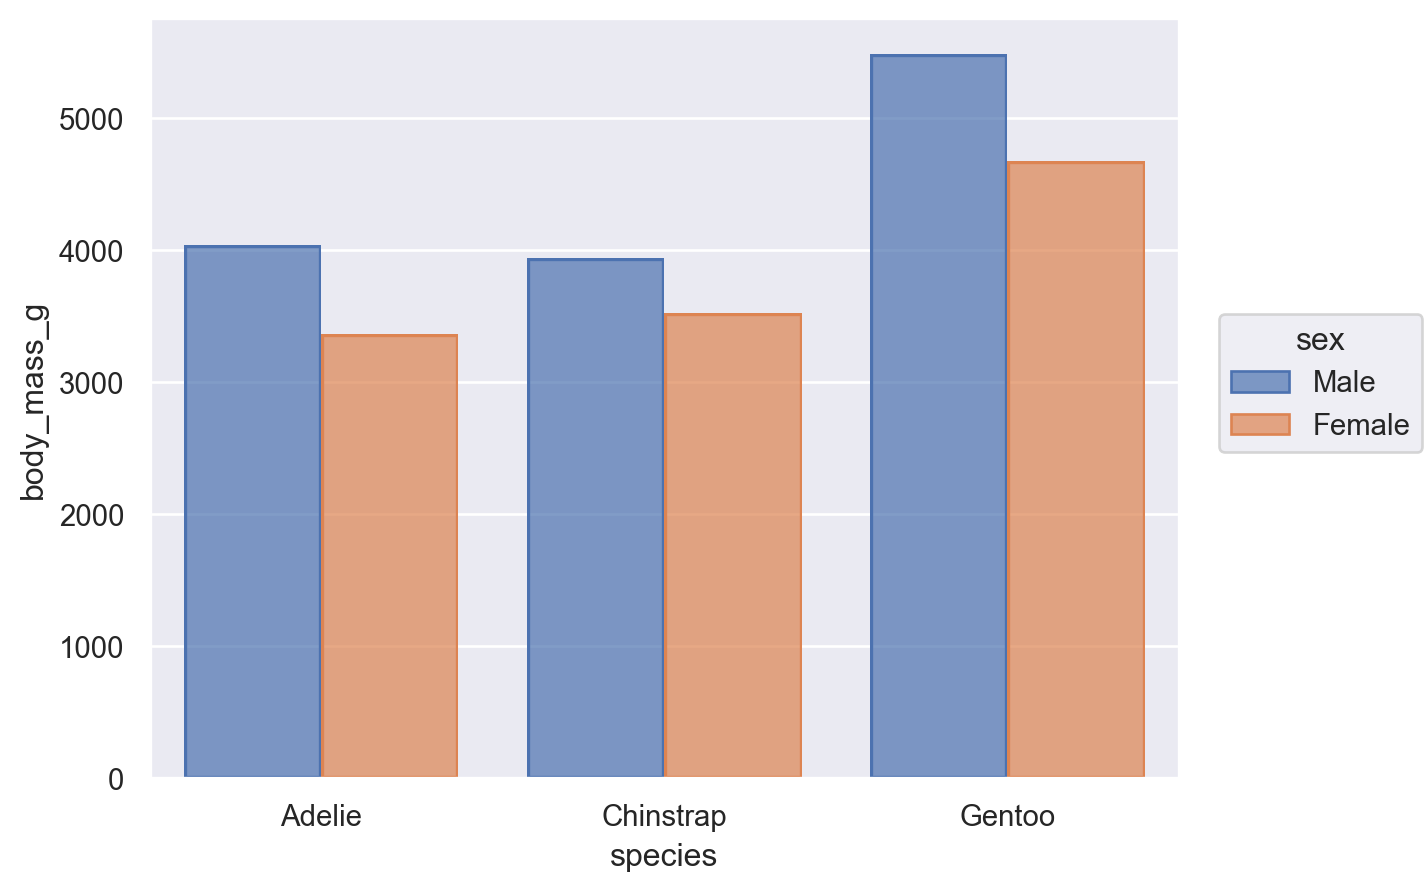

In [16]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge())
)

`Dodge` 클래스는 `Stat`과 유사하지만 x, y 좌표만 조정하는 `Move` 변환의 예입니다.     
`Move` 클래스는 모든 마크와 함께 적용할 수 있으며 먼저 `Stat`를 사용할 필요가 없습니다.

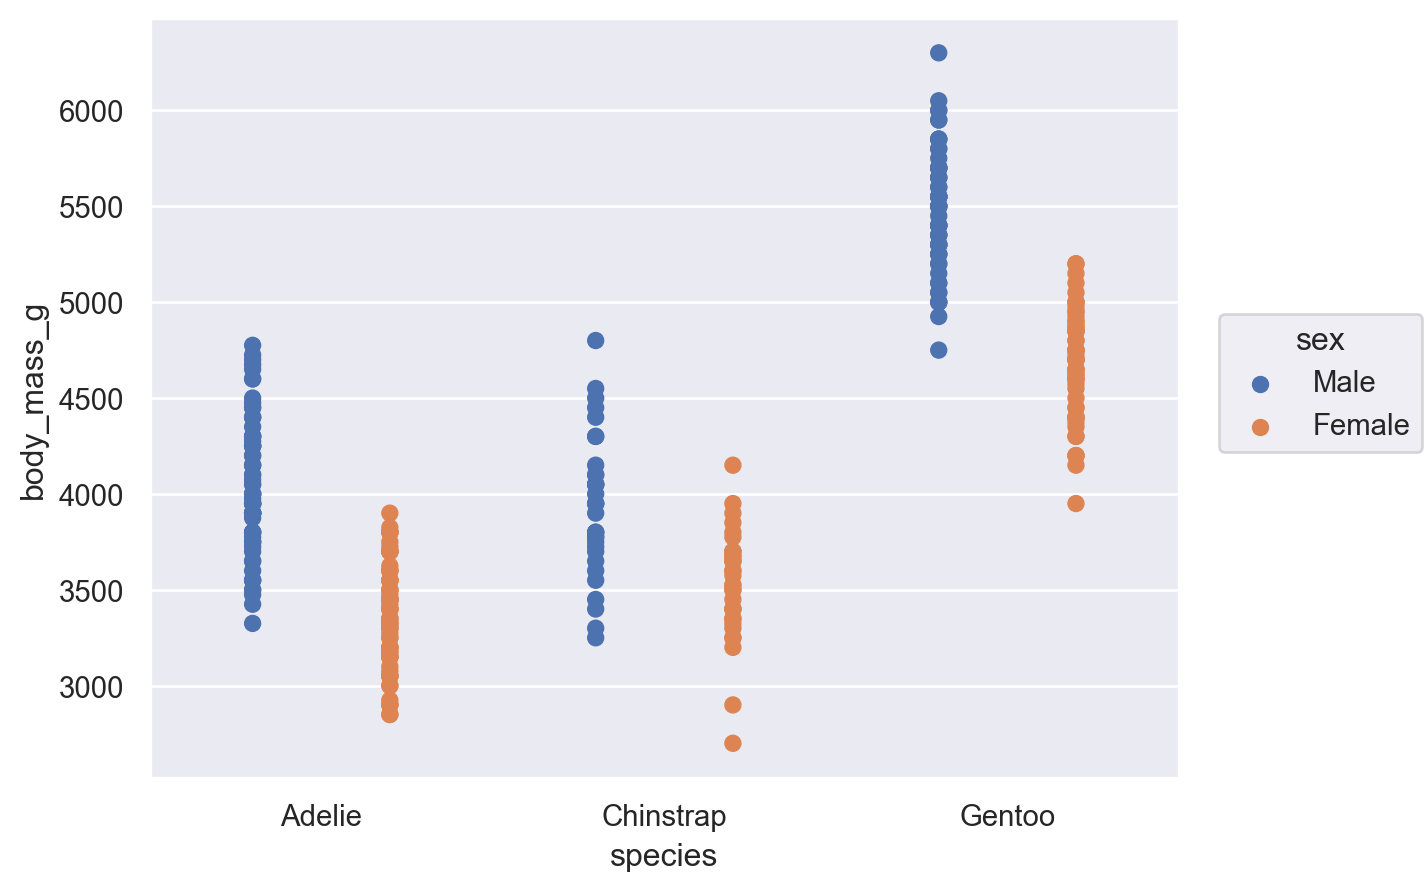

In [17]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(), so.Dodge())
)

여러 `Move` 작업을 순서대로 적용할 수도 있습니다.

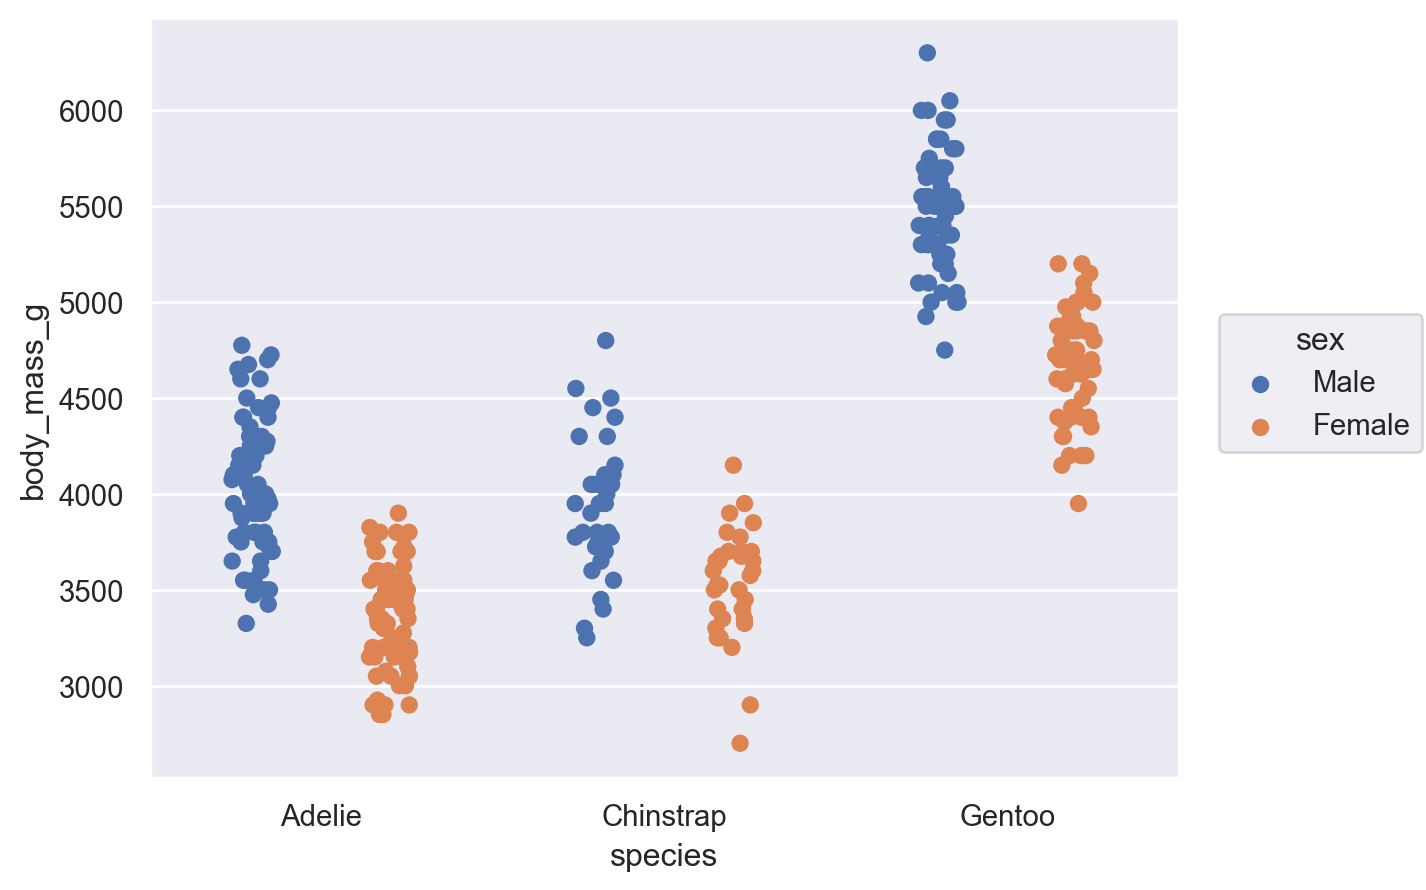

In [18]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(), so.Dodge(), so.Jitter(.3))
)

### Creating variables through transformation

`Agg` 통계는 x, y가 모두 정의되어 있어야 하지만 통계 변환을 통해 변수를 만들 수도 있습니다.   
예를 들어, `Hist` 통계는 x, y 중 하나만 정의하면 관측치를 세어 다른 하나를 생성합니다.

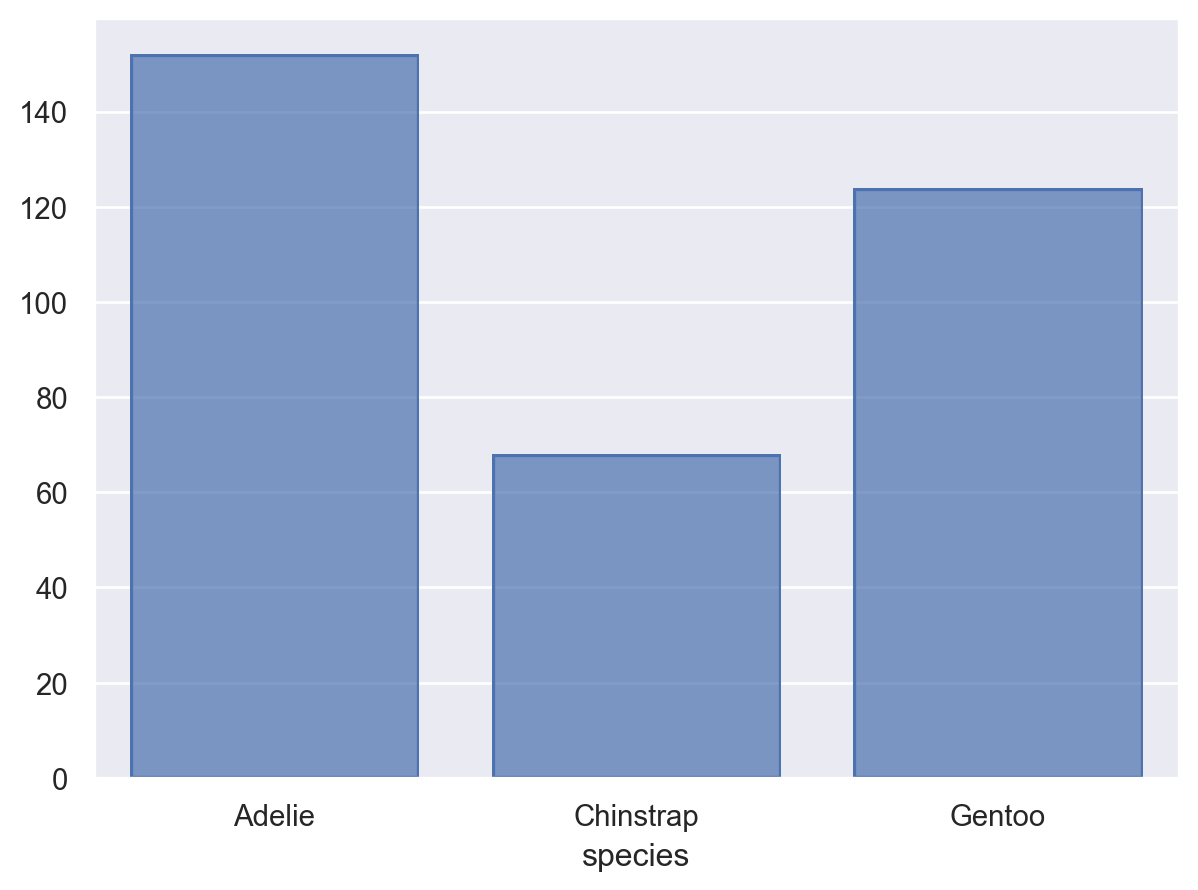

In [19]:
(
    so.Plot(penguins, x="species")
    .add(so.Bar(), so.Hist())
)

또, `Hist` 통계는 숫자 데이터가 주어질 때 새로운 x 값(bin으로)을 생성합니다:

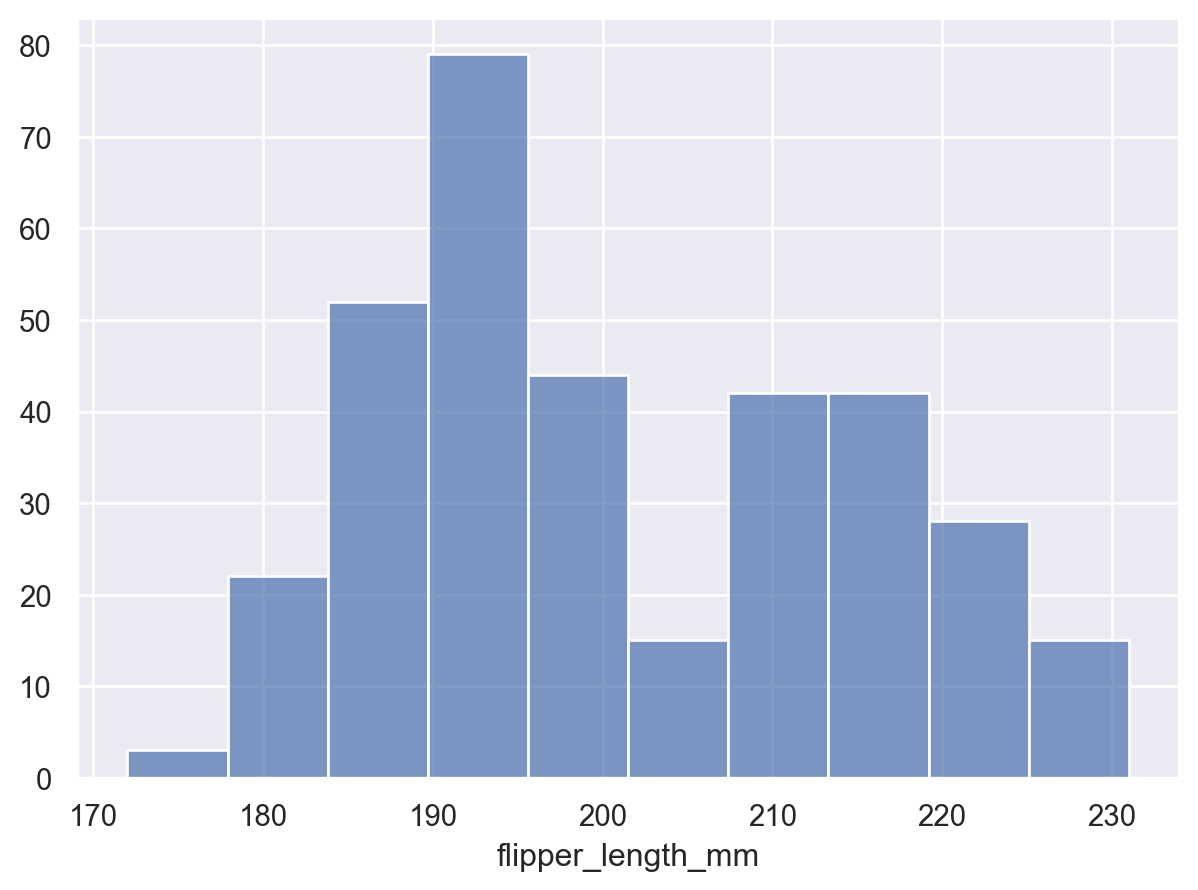

In [20]:
(
    so.Plot(penguins, x="flipper_length_mm")
    .add(so.Bars(), so.Hist())
)

연속 x축이 있는 플롯에 개별 막대(`Bar`) 대신 막대들(`Bars`)을 사용한 방법에 주목하십시오. 이 두 마크는 관련이 있지만 막대들(`Bars`)은 기본값이 다르며 연속 히스토그램에 더 잘 작동합니다. 또한 보다 효율적인 다른 matplotlib 아티스트를 생성합니다. 다른 곳에서 단수/복수 마크 패턴을 찾을 수 있습니다. 복수 버전은 일반적으로 마크 수가 많은 경우에 최적화되어 있습니다.   
   
   일부 변환은 x와 y를 모두 허용하지만 각 좌표에 대한 간격 데이터를 추가합니다. 이는 집계 후 오류 막대를 플로팅하는 데 특히 적합합니다.

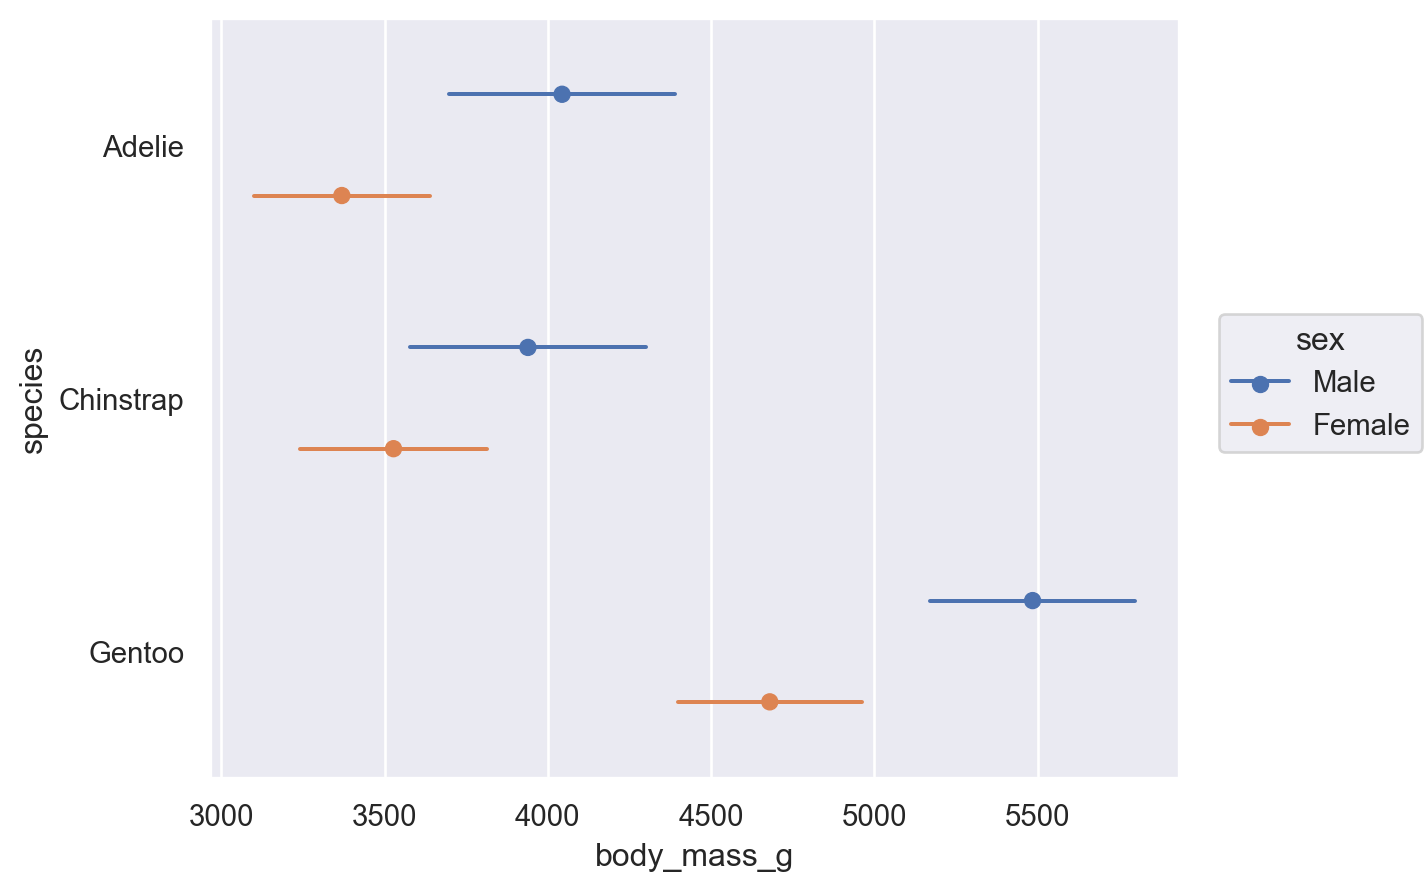

In [21]:
(
    so.Plot(penguins, x="body_mass_g", y="species", color="sex")
    .add(so.Range(), so.Est(errorbar="sd"), so.Dodge())
    .add(so.Dot(), so.Agg(), so.Dodge())
)

### Orienting marks and transforms

막대를 aggregating, dodging, drawing 할 때 x, y 변수는 다르게 처리됩니다. 각 작업엔 방향(Orientaion) 개념이 있습니다.    
`Plot`은 변수의 데이터 유형을 기반으로 방향을 자동으로 결정하려고 시도합니다.   
예를 들어, species와 body_mass_g의 할당을 뒤집으면 동일한 플롯을 얻을 수 있지만 수평방향으로 표현됩니다.

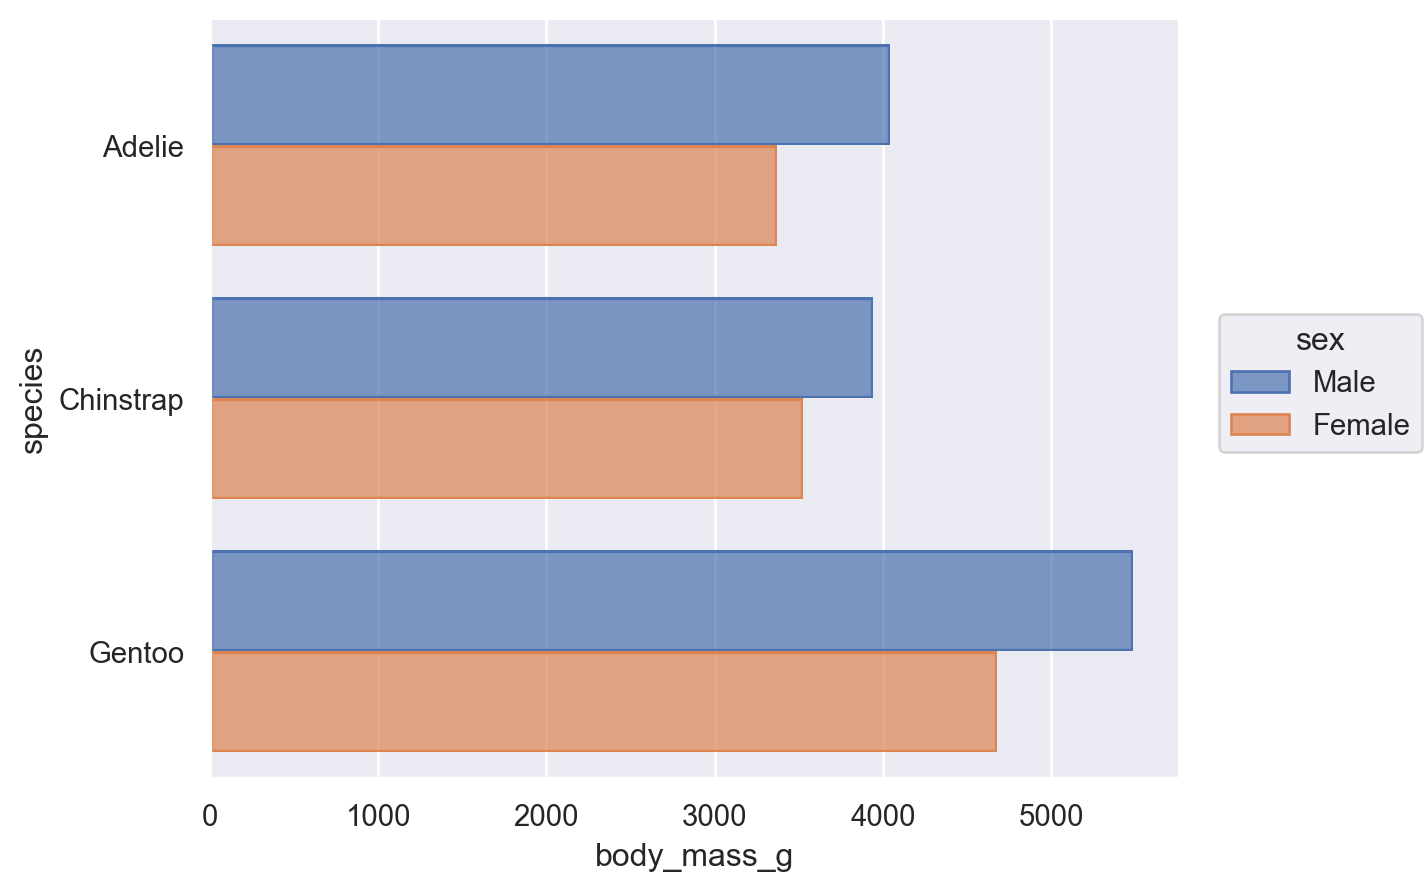

In [22]:
(
    so.Plot(penguins, x="body_mass_g", y="species", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge())
)

x, y 변수가 모두 숫자일 때와 같은 경우 올바른 방향이 모호합니다. 이러한 경우 `Plot.add()`에 orient 매개변수를 전달하여 명시적으로 지정할 수 있습니다.

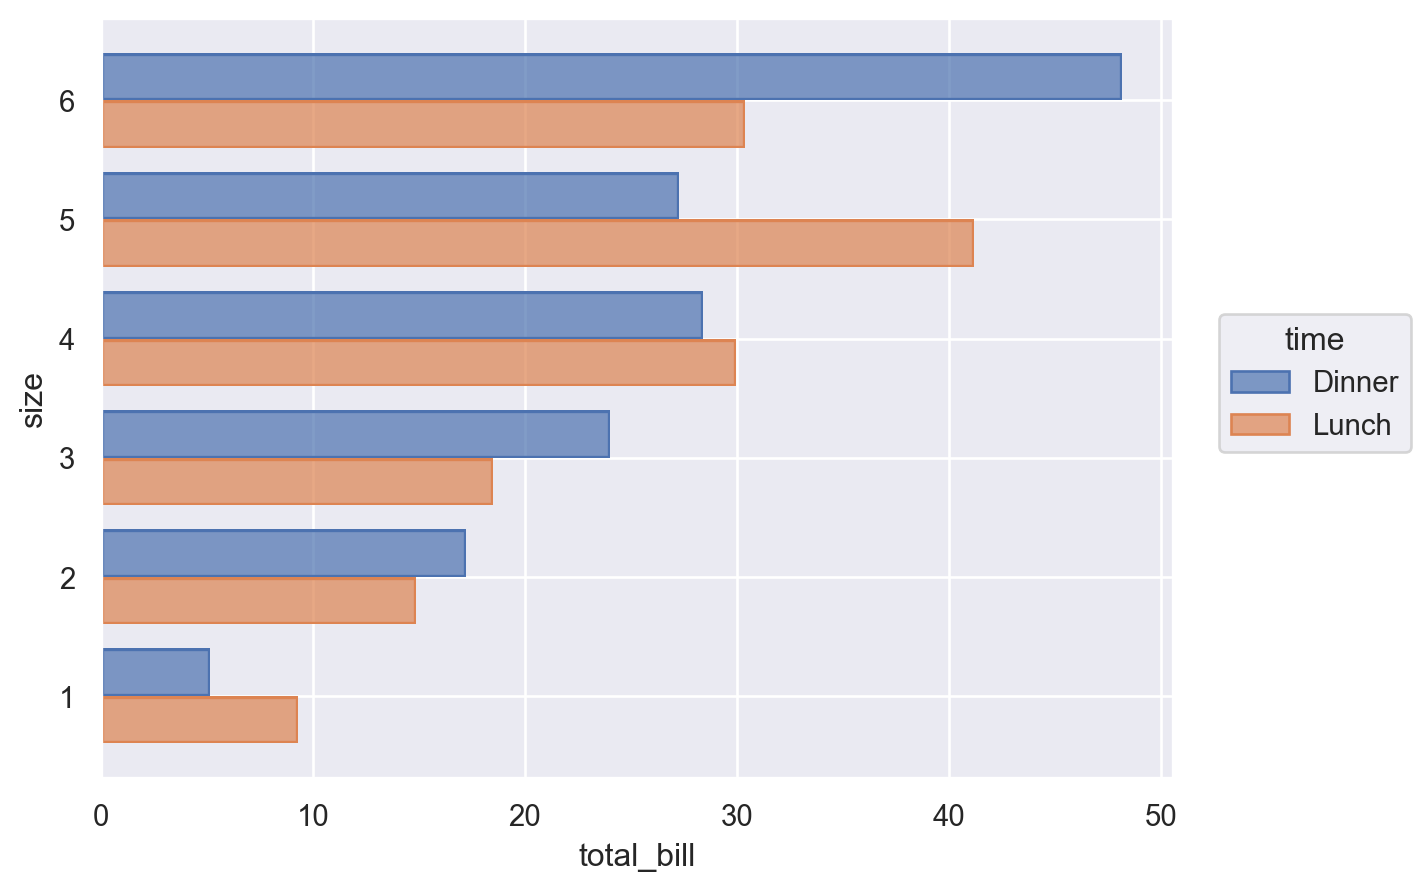

In [24]:
tips = sns.load_dataset("tips")

(
    so.Plot(tips, x="total_bill", y="size", color="time")
    .add(so.Bar(), so.Agg(), so.Dodge(), orient="y")
)